# Data Science Camp 2026  
## Task 1

Generate the sequence of 26 random integer values from 0 to 26.
Build the plot that joins each neighbour's values as shown on the image for
sample [ 2, 7, 25, 14, 14, 21, 20, 6, 13, 3, 23, 14, 1, 8, 1, 8, 16, 21, 2, 17,
7, 5, 20, 17, 18, 10]

Consider the values as the heights of 2d mountains on which the rain falls
from above. Those subsequences that have larger values on boundaries
form the lakes.

1) Develop the function that accepts the list of provided 26 integer
values and calculates the depth of the deepest lake. Considering the
above example, the response should be 20 which is the depth of the
lake formed by subsequence [23, 14, 1, 8, 1, 8, 16, 21]
2) Visualize the values as heights and highlight the deepest lake.

## Importing needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generating list of 26 random values

In [2]:
# Generating list of 26 random values from 0 to 26
random_values = np.random.randint(0, 27, size=26).tolist()

# Provided sample from the task
sample_values = [2, 7, 25, 14, 14, 21, 20, 6, 13, 3, 23, 14, 1, 8, 1, 8, 16, 21, 2, 17, 7, 5, 20, 17, 18, 10]

print(f"Random Sequence: {random_values}")
print(f"Sample Sequence: {sample_values}")

Random Sequence: [18, 10, 8, 6, 17, 4, 6, 16, 21, 24, 7, 4, 25, 12, 23, 18, 1, 14, 24, 20, 17, 1, 7, 12, 19, 11]
Sample Sequence: [2, 7, 25, 14, 14, 21, 20, 6, 13, 3, 23, 14, 1, 8, 1, 8, 16, 21, 2, 17, 7, 5, 20, 17, 18, 10]


## Function that calculates the depth of deepest lake

This contains the basic logic of the algorithm. The function finds the water levels and calculates the depth.

In [3]:
def calculate_deepest_lake(heights):
  
    n = len(heights)
    if n < 3: return 0, (0, 0)

    l_max = np.zeros(n)
    r_max = np.zeros(n)
    l_max[0], r_max[-1] = heights[0], heights[-1]
    
    for i in range(1, n): l_max[i] = max(l_max[i-1], heights[i])
    for i in range(n-2, -1, -1): r_max[i] = max(r_max[i+1], heights[i])

    # Calculate depth at each point
    depths = [int(min(l_max[i], r_max[i]) - heights[i]) for i in range(n)]
    max_depth = max(depths)
    
    if max_depth <= 0: return 0, (0, 0)

    # Find all indices with max depth
    candidates = [i for i, d in enumerate(depths) if d == max_depth]
    
    # Tie-breaker so we pick the one with the lowest absolute floor 
    best_idx = min(candidates, key=lambda i: heights[i])
    
    # Find the specific boundaries for this basin
    water_level = heights[best_idx] + max_depth
    
    start_idx = best_idx
    while start_idx > 0 and heights[start_idx] < water_level:
        start_idx -= 1
        
    end_idx = best_idx
    while end_idx < n - 1 and heights[end_idx] < water_level:
        end_idx += 1

    return max_depth, (start_idx, end_idx)

# Result of calculation for the provided sample
depth, boundaries = calculate_deepest_lake(sample_values)
print(f"Deepest Lake Depth: {depth}")  
print(f"Lake subsequence: {sample_values[boundaries[0]:boundaries[1]+1]}")

Deepest Lake Depth: 20
Lake subsequence: [23, 14, 1, 8, 1, 8, 16, 21]


## Visualization



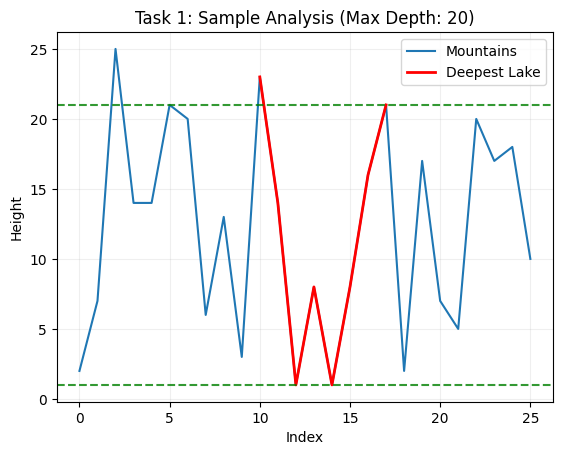

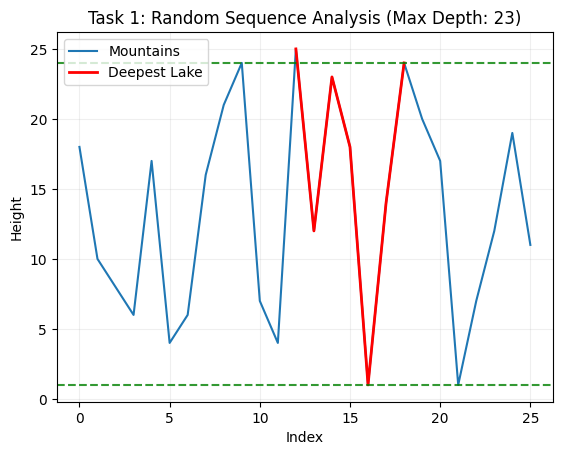

In [4]:
def visualize_task_result(heights, title="Deepest Lake Visualization"):
    depth, (start, end) = calculate_deepest_lake(heights)
    
    plt.plot(heights, color='tab:blue', label='Mountains')
    
    # Visualization i highlighted the deepest lake in red
    lake_x = list(range(start, end + 1))
    lake_y = heights[start:end + 1]
    plt.plot(lake_x, lake_y, color='red', linewidth=2, label='Deepest Lake')
    
    if depth > 0:
        water_level = min(heights[start], heights[end])
        bottom_level = min(lake_y)
        # Green dashed lines as it was in the task 
        plt.axhline(y=water_level, color='green', linestyle='--', alpha=0.8)
        plt.axhline(y=bottom_level, color='green', linestyle='--', alpha=0.8)
        
    plt.title(f"{title} (Max Depth: {depth})")
    plt.xlabel("Index")
    plt.ylabel("Height")
    plt.xticks(range(0, 26, 5))
    plt.yticks(range(0, 30, 5))
    plt.grid(True, alpha=0.2)
    plt.legend()
    plt.show()

# Show result for the sample
visualize_task_result(sample_values, "Task 1: Sample Analysis")

# Show result for the random sequence
visualize_task_result(random_values, "Task 1: Random Sequence Analysis")

We implemented a solution based on the 'trapping rain water' problem to identify the deepest lake in a generated landscape. The function passed the validation step with the sample data (Depth: 20). The accompanying visualization provides a clear graphical output, marking the specific lake and its depth with distinct indicators.